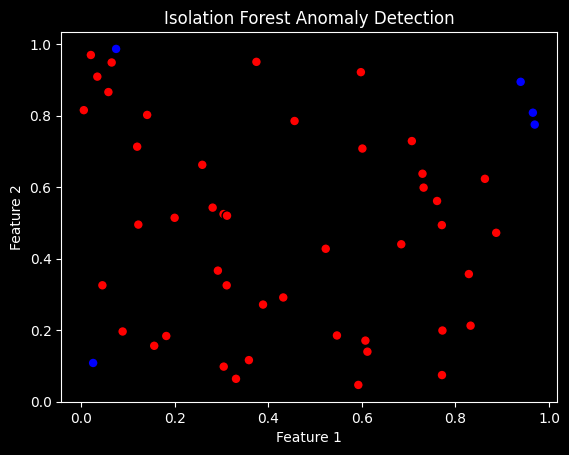

In [1]:
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# --- 1. 数据准备 ---
# 随机生成50个数据点
np.random.seed(42)  # 为了结果的可重复性设置随机种子
X = np.random.rand(50, 2)  # 2维数据，2列好画图来解释

# --- 2. 模型初始化 ---
# 初始化Isolation Forest模型
# contamination参数表示异常值比例，默认0.1（即预计有10%的数据是异常的）
# random_state参数表示随机种子，因为要设置随机分划点
iso_forest = IsolationForest(random_state=42, contamination=0.1)

# --- 3. 训练模型 ---
# 随机建树的过程
iso_forest.fit(X)

# --- 4. 预测与打分 ---
# 预测每个点的异常分数，在树中的高度越低，越可能是异常点
scores = iso_forest.decision_function(X)

# print(scores)

# 将异常分数转换为1 (正常) 和-1 (异常) 的标签
labels = iso_forest.predict(X)

# print(labels)

# --- 5. 可视化 ---
# 绘制数据点和异常点
# c=labels: 根据标签上色（1和-1颜色不同）
# cmap=plt.cm.bwr: 使用蓝白红颜色映射（通常红色代表异常，蓝色代表正常，具体取决于cmap方向）
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=plt.cm.bwr, edgecolor='k', s=50)
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()